<a href="https://colab.research.google.com/github/BaishaliChetia/CapsNet-Keras/blob/master/vggFashionMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tempfile
import os

import tensorflow as tf
import numpy as np

from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

%load_ext tensorboard

In [ ]:
pip install -q tensorflow-model-optimization

     |████████████████████████████████| 211 kB 13.2 MB/s 


In [ ]:
import tensorflow_model_optimization as tfmot

In [2]:
tf.random.set_seed(500000)

In [3]:
# Load MNIST dataset
mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the input image so that each pixel value is between 0 and 1.
train_images = train_images / 255.0
test_images = test_images / 255.0

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
train_X =[]

for i in range(train_images.shape[0]):
  train_pad = np.pad(train_images[i], pad_width=10 , mode= 'edge')
  #print(train_pad)
  train_X.append(train_pad)
#PADDING test images
test_X = []
for i in range(test_images.shape[0]):
  test_pad = np.pad(test_images[i], pad_width=10 , mode= 'edge')
  #print(train_pad)
  test_X.append(test_pad)
train_X = np.array(train_X)
test_X = np.array(test_X)
train_X.shape, test_X.shape

((60000, 48, 48), (10000, 48, 48))

In [5]:
train_X=np.dstack([train_X] * 3)
test_X=np.dstack([test_X]*3)
train_X.shape,test_X.shape

((60000, 48, 144), (10000, 48, 144))

In [6]:
train_X = train_X.reshape(-1, 48,48,3)
test_X= test_X.reshape (-1,48,48,3)

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X.shape,test_X.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [16]:
from keras.callbacks import ModelCheckpoint, CSVLogger
#comparison_metric = MyAccuracy()
#checkpoint_filepath = "/content/drive/MyDrive/Weights/weights-improvement-{epoch:02d}-{val_my_accuracy:.2f}.hdf5"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath = "/content/drive/MyDrive/FashionMnistResults/vggfashion_best_weights2.hdf5",
        save_weights_only=True,
        monitor="val_accuracy",
        #monitor="val_my_accuracy_19",
        mode='max',
        save_best_only=True)
model_checkpoint_callback2 = tf.keras.callbacks.ModelCheckpoint(
        filepath = "/content/drive/MyDrive/FashionMnistResults/vggfashion_latest_weights2.hdf5",
        save_weights_only=True,
        monitor="val_accuracy",
        mode='max',
        save_best_only=False)
log_csv = CSVLogger("/content/drive/MyDrive/FashionMnistResults/vggfashion_mylogs2.csv", separator = ",", append = False)
callback_list = [model_checkpoint_callback,model_checkpoint_callback2, log_csv]

In [17]:
vggModel = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
vggModel.trainable = True
model2 = keras.Sequential([
  vggModel,
  keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(50, activation = 'relu'),
  keras.layers.Dense(10, activation = 'softmax')
])
# Train the digit classification model
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model2.fit(
  train_X,
  train_labels,
  epochs= 50,
  validation_split=0.1, callbacks = callback_list
)


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1688/1688 [==============================] - 46s 26ms/step - loss: 0.9961 - accuracy: 0.6109 - val_loss: 0.6014 - val_accuracy: 0.7822
Epoch 2/50
1688/1688 [==============================] - 44s 26ms/step - loss: 0.5354 - accuracy: 0.8121 - val_loss: 0.4599 - val_accuracy: 0.8355
Epoch 3/50
1688/1688 [==============================] - 44s 26ms/step - loss: 0.4442 - accuracy: 0.8451 - val_loss: 0.4436 - val_accuracy: 0.8532
Epoch 4/50
1688/1688 [==============================] - 44s 26ms/step - loss: 0.4094 - accuracy: 0.8571 - val_loss: 0.3642 - val_accuracy: 0.8680
Epoch 5/50
1688/1688 [==============================] - 44s 26ms/step - loss: 0.3835 - accuracy: 0.8664 - val_loss: 0.3537 - val_accuracy: 0.8693
Epoch 6/50
1688/1688 [==============================] - 44s 26ms/step - loss: 0.3800 - accuracy: 0.8671 - val_loss: 0.3625 - val_accuracy: 0.8643
Epoch 7/50
1688/1688 [==============================] - 44s 26ms/step - loss: 0.3321 - accuracy: 0.8797 - val_loss: 0.3710 - val_accura

In [18]:
vggfashion_baseModel = model2.save("/content/drive/MyDrive/FashionMnistResults/vggfashion_save_basemodel2.tf", save_format='tf')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/FashionMnistResults/vggfashion_save_basemodel2.tf/assets


In [22]:
model1 =  keras.models.load_model("/content/drive/MyDrive/FashionMnistResults/vggfashion_save_basemodel2.tf")
model1.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_13 (Dense)             (None, 50)                12850     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                510       
Total params: 14,859,376
Trainable params: 14,859,376
Non-trainable params: 0
__________________________________________

In [23]:
model1.load_weights("/content/drive/MyDrive/FashionMnistResults/vggfashion_best_weights2.hdf5")

In [25]:
_, baseline_model_accuracy = model1.evaluate(
    test_X, test_labels, verbose=1)

  6/313 [..............................] - ETA: 3s - loss: 0.3626 - accuracy: 0.9115  

/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


313/313 [==============================] - 3s 9ms/step - loss: 0.3155 - accuracy: 0.9064


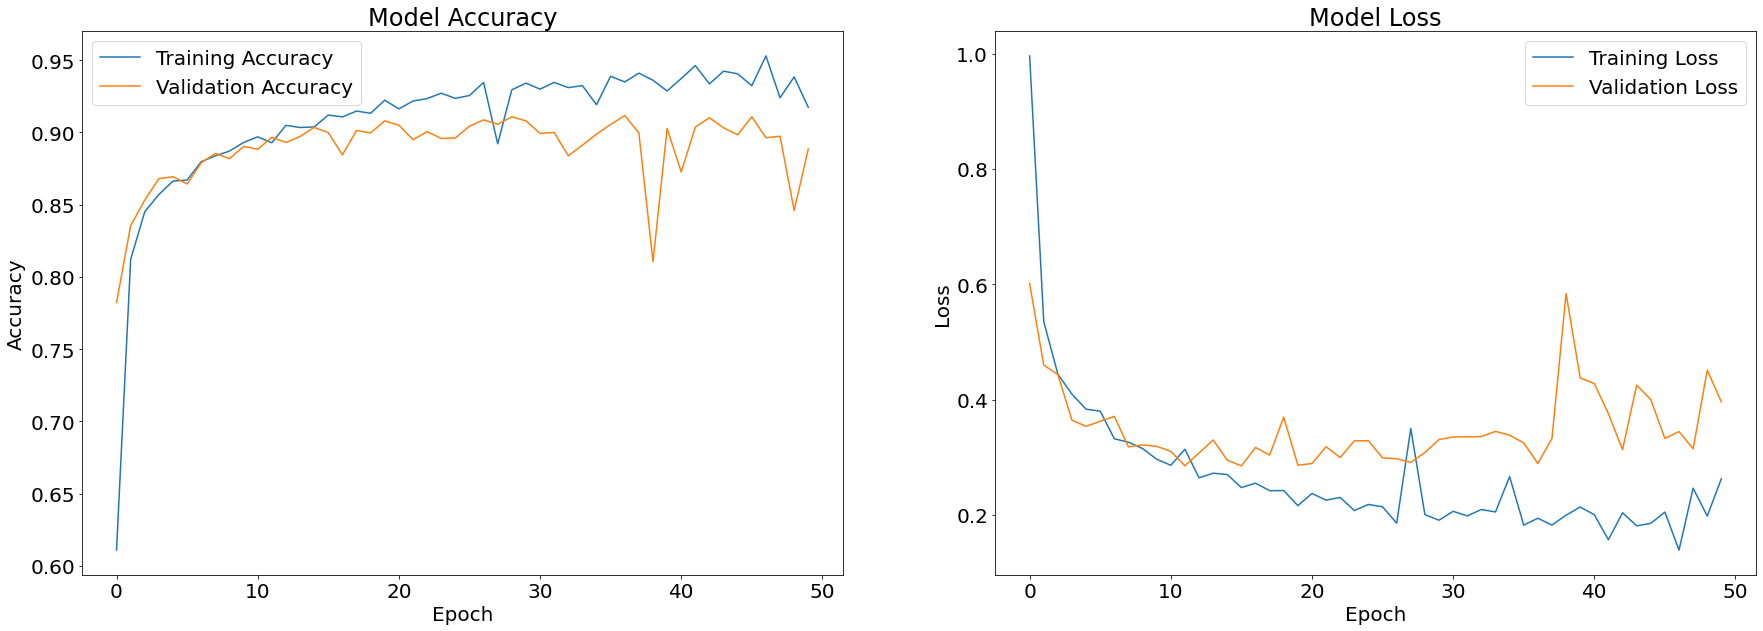

In [20]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (30, 10)
plt.rcParams["font.size"] = 20

fig, ax = plt.subplots(1, 2)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Training Accuracy', 'Validation Accuracy'], loc='best')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Training Loss', 'Validation Loss'], loc='best')
plt.show()